In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [155]:
df=pdr.get_data_yahoo('SPY','2012-01-01','2020-01-01')
df.head()
df=df[['High','Low','Open','Close']]
df['Open-Close']=df['Open']-df['Close']
df['High-Low']=df['High']-df['Low']
df


,High,Low,Open,Close,Open-Close,High-Low
Date,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,0.260002,0.950005
2012-01-04,127.809998,126.709999,127.199997,127.699997,-0.500000,1.099998
2012-01-05,128.229996,126.430000,127.010002,128.039993,-1.029991,1.799995
2012-01-06,128.220001,127.290001,128.199997,127.709999,0.489998,0.930000
2012-01-09,128.179993,127.410004,128.000000,128.020004,-0.020004,0.769989
...,...,...,...,...,...,...
2019-12-24,321.519989,320.899994,321.470001,321.230011,0.239990,0.619995
2019-12-26,322.950012,321.640015,321.649994,322.940002,-1.290009,1.309998
2019-12-27,323.799988,322.279999,323.739990,322.859985,0.880005,1.519989


In [269]:
X=df[['Open-Close','High-Low']].iloc[:].values
y=np.where(df['Close'].shift(-1)>df['Close'],1,-1)
split=int(0.7*len(df))
X_train=X[:split]
y_train=y[:split]
X_test=X[split:]
y_test=y[split:]


In [157]:
test_error=[]
for i in range(1,1400,2):
    
    knn=KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
#     accuracy_test=accuracy_score(y_test,knn.predict(X_test))
    f1=f1_score(y_pred,y_test)
    error=1-f1
    test_error.append(error)


0.5662251655629139

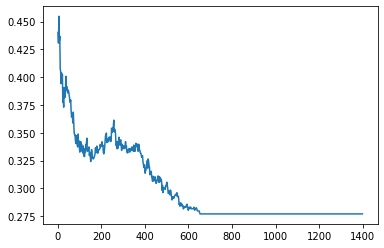

In [158]:
plt.plot(range(1,1400,2),test_error)
accuracy_score(y_test,knn.predict(X_test))

In [271]:
knn=KNeighborsClassifier(n_neighbors=37)
knn.fit(X_train,y_train)
y_pre=knn.predict(X_test)
accuracy_score(y_test,y_pre)
y_prepre=knn.predict(X)

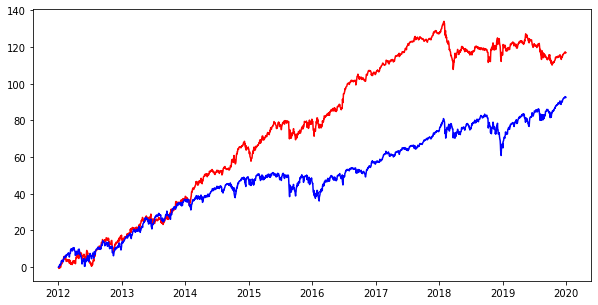

In [272]:
df['predicted_signal']=knn.predict(X)
df['SPY_return']=np.log(df['Close']/df['Close'].shift(1))
cumm_SPY_return=df['SPY_return'].cumsum()*100
df['strategy_return']=df['SPY_return']*df['predicted_signal'].shift(1)
cumm_strategy_return=df['strategy_return'].cumsum()*100
# cumm_strategy_return
cumm_SPY_return
plt.figure(figsize=(10,5))
plt.plot(cumm_strategy_return,c='red',label='strategy')
plt.plot(cumm_SPY_return,c='blue',label='SPY')
# plt.plot((np.log(df['Close']/df['Close'].shift(1))))

,High,Low,Open,Close,Open-Close,High-Low,predicted_signal,SPY_return,strategy_return
Date,,,,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,0.260002,0.950005,-1,NaN,NaN
2012-01-04,127.809998,126.709999,127.199997,127.699997,-0.500000,1.099998,-1,0.001567,-0.001567
2012-01-05,128.229996,126.430000,127.010002,128.039993,-1.029991,1.799995,1,0.002659,-0.002659
2012-01-06,128.220001,127.290001,128.199997,127.709999,0.489998,0.930000,1,-0.002581,-0.002581
2012-01-09,128.179993,127.410004,128.000000,128.020004,-0.020004,0.769989,1,0.002424,0.002424
2012-01-10,129.649994,128.949997,129.389999,129.130005,0.259995,0.699997,1,0.008633,0.008633
2012-01-11,129.369995,128.520004,128.729996,129.199997,-0.470001,0.849991,-1,0.000542,0.000542
2012-01-12,129.699997,128.539993,129.570007,129.509995,0.060013,1.160004,1,0.002396,-0.002396
2012-01-13,129.050003,127.720001,128.639999,128.839996,-0.199997,1.330002,1,-0.005187,-0.005187


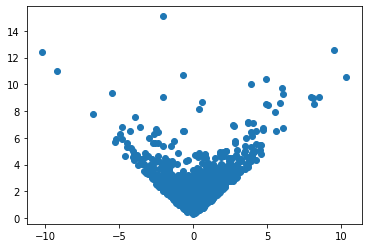

In [274]:
plt.scatter(X[:,0],X[:,1])
len(knn.predict(X))
df.head(18)


In [277]:
knn.predict([[0.7329831,0.0932]])
# u[0:1]=0.923,0.2393
# X=X.iloc[:].values
# X=X[split:]

array([-1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


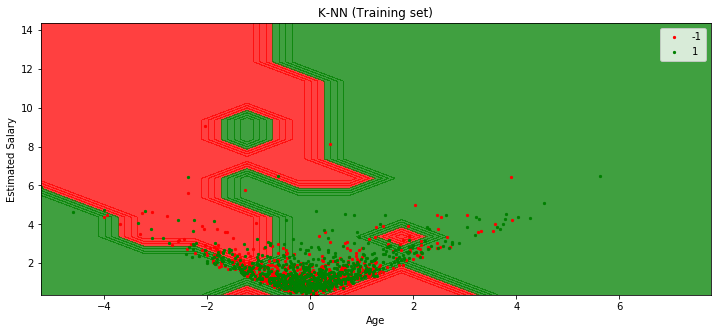

In [287]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,5))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max() , step = 1),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 1))
plt.contourf(X1, X2, knn.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],s=5, c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()